#**Parameter Analysis for the ARIMA model**

## Import the library


In [11]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima
import pandas as pd


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Read dataset

In [8]:
df = pd.read_csv('/content/traffic-3.csv')
df = df.iloc[:100]

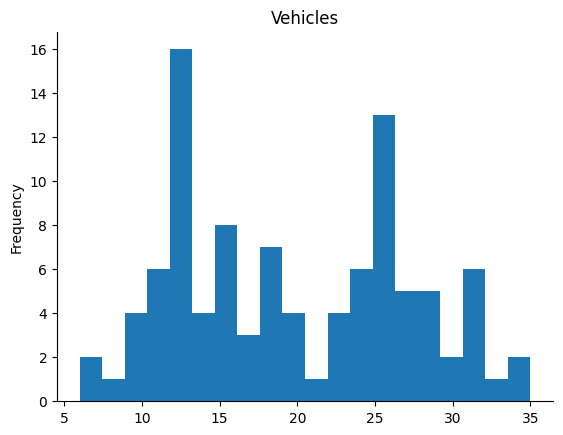

In [15]:
from matplotlib import pyplot as plt
df['Vehicles'].plot(kind='hist', bins=20, title='Vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

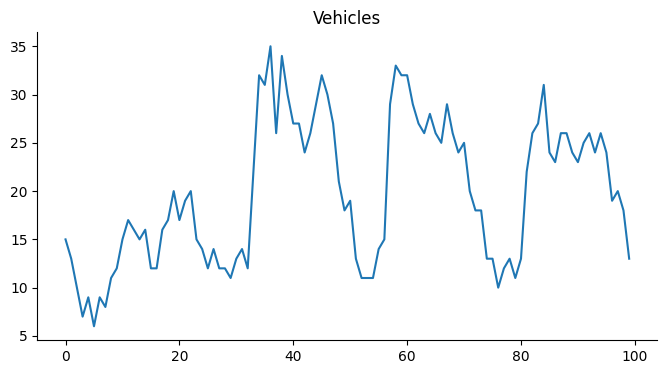

In [17]:
from matplotlib import pyplot as plt
df['Vehicles'].plot(kind='line', figsize=(8, 4), title='Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

## Fit auto_arima function to traffic dataset


In [9]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=674.797, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=482.218, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=674.536, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=540.301, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=483.810, Time=0.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=485.829, Time=3.37 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=583.530, Time=0.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=481.408, Time=0.35 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=540.708, Time=0.09 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=483.084, Time=1.12 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, T

## To print the summary


In [10]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -235.886
Date:                            Wed, 21 Aug 2024   AIC                            479.773
Time:                                    08:47:27   BIC                            489.682
Sample:                                         0   HQIC                           483.765
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6850      0.093      7.351      0.000       0.502       0.868
ar.L2          0.1898      0.088      2.161      0.031       0.018       0.362
ar.S.L12      -0.7598      0.084     -9.051      0.000      -0.924      -0.595
sigma2        10.9671      1.671      6.564      0.000       7.692      14.242
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.98   Prob(JB):                         0.46
Heteroskedasticity (H):               0.53   Skew:                             0.19
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [21]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [22]:


model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                   88
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -202.483
Date:                            Wed, 21 Aug 2024   AIC                            414.967
Time:                                    09:34:40   BIC                            426.554
Sample:                                         0   HQIC                           419.594
                                             - 88                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1855      0.116     -1.605      0.108      -0.412       0.041
ar.S.L12      -0.1799      0.376     -0.478      0.633      -0.918       0.558
ar.S.L24       0.2725      0.332      0.821      0.411      -0.378       0.923
ma.S.L12      -0.9993    137.618     -0.007      0.994    -270.726     268.727
sigma2         9.2516   1270.522      0.007      0.994   -2480.926    2499.429
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.92   Prob(JB):                         0.42
Heteroskedasticity (H):               0.82   Skew:                             0.37
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [23]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")


## plot predictions and actual values



<Axes: >

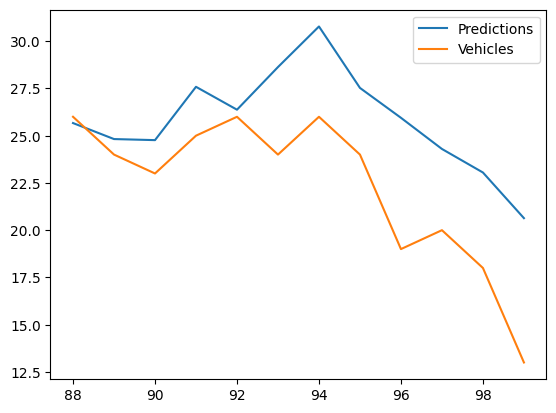

In [24]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [25]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Vehicles"], predictions)

# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)


18.165803087875414

#**Well Done :)**